In [1]:
# Import relevant items    
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [2]:
foo = r'C:\Users\ACER\Desktop\python project\airqo/Bugolobi.csv'

In [3]:
df= pd.read_csv(foo, parse_dates=True)
#swaps day & month
df.TimeStamp = pd.to_datetime(df.TimeStamp, dayfirst=True)
#df = df.set_index('TimeStamp')

In [4]:

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pm2_5      8057 non-null   float64       
 1   pm10       8057 non-null   float64       
 2   s2_pm2_5   8057 non-null   float64       
 3   s2_pm10    8057 non-null   float64       
 4   TimeStamp  8057 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 314.9 KB
None


,pm2_5,pm10,s2_pm2_5,s2_pm10,TimeStamp
0,19.80,19.90,20.77,21.88,2019-03-12 09:57:00
1,21.70,22.47,19.18,20.33,2019-03-12 09:58:00
2,13.42,14.03,14.18,15.15,2019-03-12 11:14:00
3,12.72,13.97,14.83,15.52,2019-03-12 11:15:00
4,13.93,13.97,17.40,17.87,2019-03-12 11:17:00


In [5]:
# findng the average of both sensors
df['mean_pm2_5'] = df.iloc[:,[0,2]].mean(axis=1)
df['mean_pm10'] = df.iloc[:,[1,3]].mean(axis=1)
print(df.head(5))

   pm2_5   pm10  s2_pm2_5  s2_pm10           TimeStamp  mean_pm2_5  mean_pm10
0  19.80  19.90     20.77    21.88 2019-03-12 09:57:00      20.285     20.890
1  21.70  22.47     19.18    20.33 2019-03-12 09:58:00      20.440     21.400
2  13.42  14.03     14.18    15.15 2019-03-12 11:14:00      13.800     14.590
3  12.72  13.97     14.83    15.52 2019-03-12 11:15:00      13.775     14.745
4  13.93  13.97     17.40    17.87 2019-03-12 11:17:00      15.665     15.920


# Date Features
Sometimes classical time series algorithms won't suffice for making powerful predictions. In such cases, it's sensible to convert the time series data to a machine learning algorithm by creating features from the time variable. The code below uses the pd.DatetimeIndex() function to create time features like year, day of the year, quarter, month, day, weekdays, etc.

In [6]:
import datetime
# Rename 
df = df.rename(columns={"TimeStamp": "Date"})

In [29]:
import datetime
# Rename 
df = df.rename(columns={"TimeStamp": "Date"})


df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8057 non-null   int64  
 1   channel_id      8057 non-null   int64  
 2   pm2_5           8057 non-null   float64
 3   pm10            8057 non-null   float64
 4   s2_pm2_5        8057 non-null   float64
 5   s2_pm10         8057 non-null   float64
 6   Site            8057 non-null   object 
 7   Date            8057 non-null   object 
 8   Sites           8057 non-null   object 
 9   district        8057 non-null   object 
 10  mean_pm2_5      8057 non-null   float64
 11  mean_pm10       8057 non-null   float64
 12  year            8057 non-null   int64  
 13  month           8057 non-null   int64  
 14  day             8057 non-null   int64  
 15  dayofyear       8057 non-null   int64  
 16  weekofyear      8057 non-null   int64  
 17  weekday         8057 non-null   i

<ipython-input-29-45c5a84b3dcd>:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear


I don’t need the Date variable now, so you can drop it.

In [30]:
df = df.drop(['Date'], axis = 1) 

# Dummy Encoding
Some of the variables in the dataset, such as year or quarter, need to be treated as categorical variables. So, you will convert these variables to numeric variables that can be used as factors using a technique called dummy encoding. In this technique, the features are encoded so there is no duplication of the information. This is achieved by passing in the argument drop_first=True to the .get_dummies() function, as done in the code below. The last line prints the information about the data, 

In [31]:
df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')

df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')

df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')

df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8057 non-null   int64  
 1   channel_id  8057 non-null   int64  
 2   pm2_5       8057 non-null   float64
 3   pm10        8057 non-null   float64
 4   s2_pm2_5    8057 non-null   float64
 5   s2_pm10     8057 non-null   float64
 6   Site        8057 non-null   object 
 7   Sites       8057 non-null   object 
 8   district    8057 non-null   object 
 9   mean_pm2_5  8057 non-null   float64
 10  mean_pm10   8057 non-null   float64
 11  day         8057 non-null   int64  
 12  dayofyear   8057 non-null   int64  
 13  weekofyear  8057 non-null   int64  
 14  month_12    8057 non-null   uint8  
 15  wday_1      8057 non-null   uint8  
 16  wday_2      8057 non-null   uint8  
 17  wday_3      8057 non-null   uint8  
 18  wday_4      8057 non-null   uint8  
 19  wday_5      8057 non-null  

# Data Partitioning
With the data prepared, you are ready to move to machine learning in the subsequent sections. However, before moving to predictive modeling techniques, it's important to divide the data into training and test sets.

In [37]:
train = df[df["mean_pm2_5"] == "Train"] 
test = df[df["mean_pm2_5"] == "Test"] 

print(train.shape)
print(test.shape)

(0, 22)
(0, 22)


You don’t need the mean_pm2_5 variable now, so that can be dropped using the code below.

In [34]:
train = train.drop(['mean_pm2_5'], axis = 1) 
test = test.drop(['mean_pm2_5'], axis = 1) 

# Creating Arrays for the Features and the Response Variable
With the data partitioned, the next step is to create arrays for the features and response variables. The first line of code creates an object of the target variable called target_column_train. The second line gives us the list of all the features, excluding the target variable mean_pm10. The next two lines create the arrays for the training data, and the last two lines print its shape

In [24]:
target_column_test = ['mean_pm10'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)

(0, 20)
(0, 1)


In [36]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [60]:
df.head()

,Unnamed: 0,channel_id,pm2_5,pm10,s2_pm2_5,s2_pm10,Site,Date,Sites,district,mean_pm2_5,mean_pm10
0,1040518,718028,19.80,19.90,20.77,21.88,"Bugolobi, Nakawa",2019-03-12 09:57:00,Bugolobi,Nakawa,20.285,20.890
1,1040519,718028,21.70,22.47,19.18,20.33,"Bugolobi, Nakawa",2019-03-12 09:58:00,Bugolobi,Nakawa,20.440,21.400
2,1040520,718028,13.42,14.03,14.18,15.15,"Bugolobi, Nakawa",2019-03-12 11:14:00,Bugolobi,Nakawa,13.800,14.590
3,1040521,718028,12.72,13.97,14.83,15.52,"Bugolobi, Nakawa",2019-03-12 11:15:00,Bugolobi,Nakawa,13.775,14.745
4,1040522,718028,13.93,13.97,17.40,17.87,"Bugolobi, Nakawa",2019-03-12 11:17:00,Bugolobi,Nakawa,15.665,15.920


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings  
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings  
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


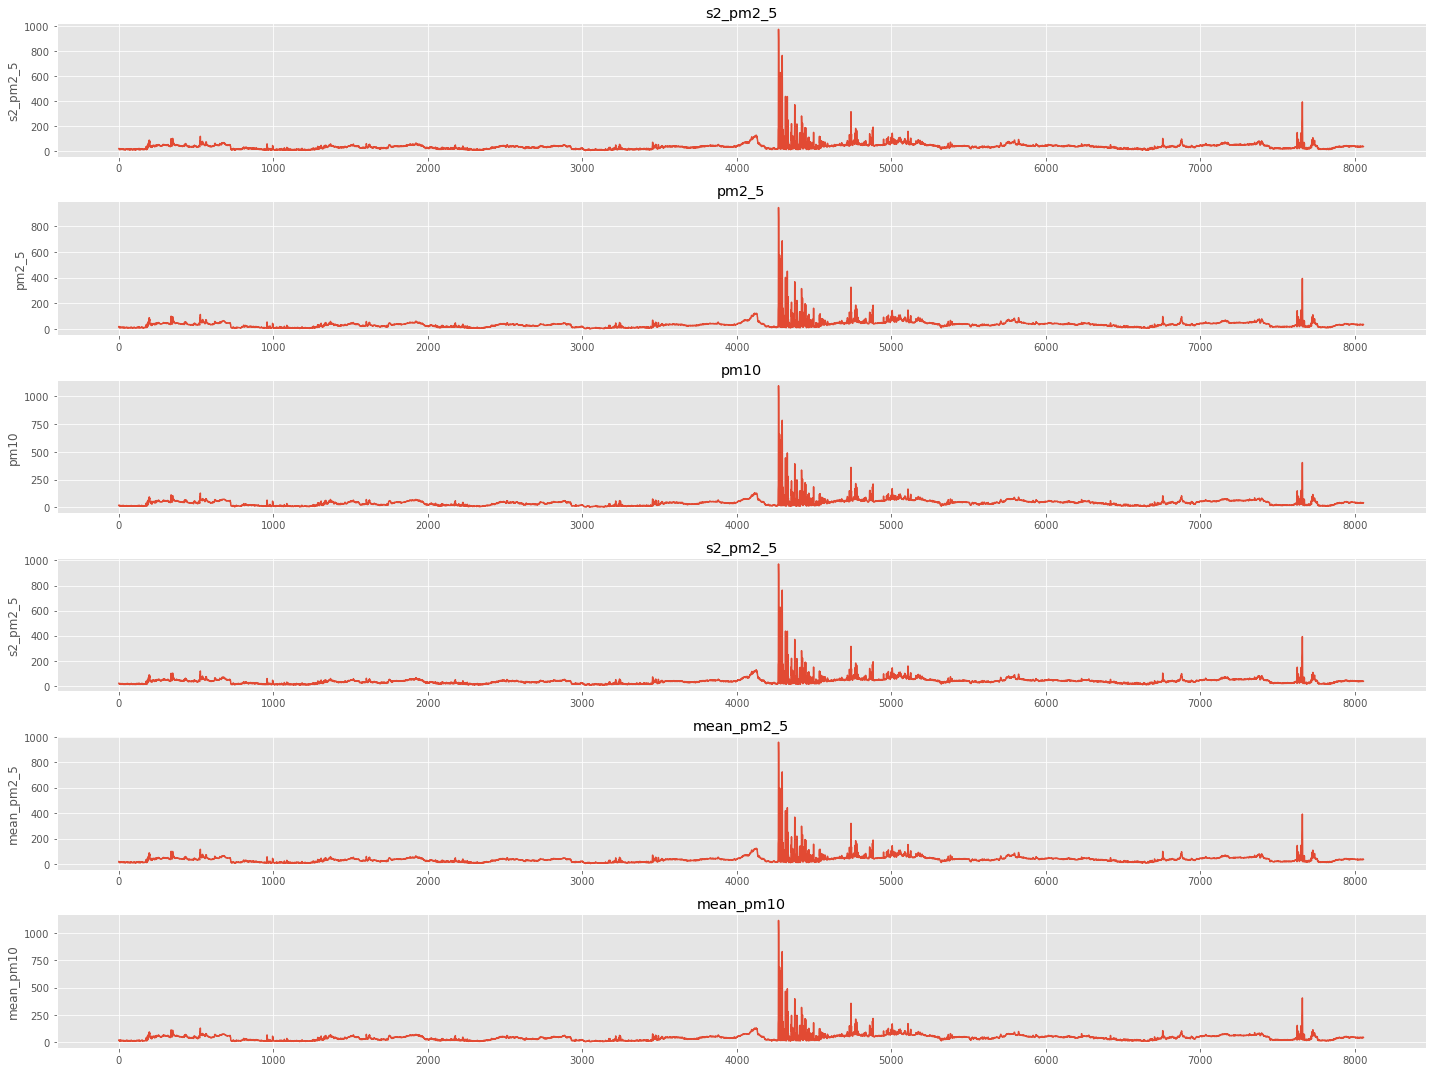

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20,15))
axes[0].set_title('s2_pm2_5')
axes[0].set_ylabel('s2_pm2_5')
df.s2_pm2_5.plot(ax=axes[0])

axes[1].set_title('pm2_5')
axes[1].set_ylabel('pm2_5')
df.pm2_5.plot(ax=axes[1])

axes[2].set_title('pm10')
axes[2].set_ylabel('pm10')
df.pm10.plot(ax=axes[2])

axes[3].set_title('s2_pm2_5')
axes[3].set_ylabel('s2_pm2_5')
df.s2_pm2_5.plot(ax=axes[3])                    
                      
axes[4].set_title('mean_pm2_5')
axes[4].set_ylabel('mean_pm2_5')
df.mean_pm2_5.plot(ax=axes[4])  


axes[5].set_title('mean_pm10')
axes[5].set_ylabel('mean_pm10')
df.mean_pm10.plot(ax=axes[5])  

plt.tight_layout()
plt.show()

In [14]:
final_df = (df.assign( day_of_week = pd.DatetimeIndex(df['Date']).dayofweek
                            ,year = pd.DatetimeIndex(df['Date']).year
                            ,month = pd.DatetimeIndex(df['Date']).month
                            ,day = pd.DatetimeIndex(df['Date']).day
                            ,day_of_year = pd.DatetimeIndex(df['Date']).dayofyear

                            ,week = pd.DatetimeIndex(df['Date']).week
                            ,quarter = pd.DatetimeIndex(df['Date']).quarter
                            ,hour = pd.DatetimeIndex(df['Date']).hour
                            ,hour_x = np.sin(2.*np.pi*pd.DatetimeIndex(df['Date']).hour/24.)
                            ,hour_y = np.cos(2*np.pi*pd.DatetimeIndex(df['Date']).hour/24.)
                            ,day_of_year_x = np.sin(2.*np.pi*pd.DatetimeIndex(df['Date']).dayofyear/365.)
                            ,day_of_year_y = np.cos(2.*np.pi*pd.DatetimeIndex(df['Date']).dayofyear/365.)

                          )
           )





In [16]:
lagged_df = final_df.copy()

# Next day's load values.
lagged_df['load_tomorrow'] = lagged_df['mean_pm2_5'].shift(-24)  

In [17]:

for day in range(8):
    lagged_df['mean_pm10' + str(day)] = lagged_df.mean_pm10.shift(24*day)
    lagged_df['pm2_5' + str(day)] = lagged_df.pm2_5.shift(24*day)
    lagged_df['pm10' + str(day)] = lagged_df.pm10.shift(24*day)
    lagged_df['s2_pm2_5' + str(day)] = lagged_df.s2_pm2_5.shift(24*day)

    
    
    lagged_df['load_d' + str(day)] = lagged_df.mean_pm2_5.shift(24*day)

In [18]:
lagged_df = lagged_df.dropna()
    

lagged_df = lagged_df.drop(columns=[ 'pm2_5', 'pm10', 's2_pm2_5', 'mean_pm2_5','mean_pm10'])

X = lagged_df.drop(columns=['load_tomorrow'])
y = lagged_df['load_tomorrow']


In [20]:
y

168     44.100
169     61.175
170     68.625
171     86.585
172     86.795
         ...  
8028    36.100
8029    38.300
8030    37.790
8031    35.940
8032    36.680
Name: load_tomorrow, Length: 7865, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [22]:

def plot_prediction(actual, prediction, start_date, end_date, title, prediction_label):
    plt.figure(figsize=(20,5))
    plt.title(title)
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, prediction, label=prediction_label)
    plt.ylabel('mean_pm2_5')
    plt.xlabel('Datetime')
    plt.legend()
    plt.xlim(left= start_date, right=end_date)
    plt.show()

In [23]:
def subplot_prediction(actual, prediction,prediction_label):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))
    
    con_df = pd.concat([actual.rename('Actual'),pd.DataFrame(prediction, index=actual.index, columns=[prediction_label])], axis=1)
    axes[0].set_title('Actual vs Prediction - One day')
    axes[0].set_ylabel('mean_pm2_5')
    axes[0].set_xlabel('Datetime')
    con_df.plot(ax=axes[0])
    axes[0].set_xlim(left=con_df.index[-24*1] , right=con_df.index[-1])
    
    axes[1].set_title('Actual vs Prediction - One week')
    axes[1].set_ylabel('mean_pm2_5')
    axes[1].set_xlabel('Datetime')
    con_df.plot(ax=axes[1])
    axes[1].set_xlim(left=actual.index[-24*7] , right=actual.index[-1])
    
    axes[2].set_title('Actual vs Prediction - One month')
    axes[2].set_ylabel('mean_pm2_5')
    axes[2].set_xlabel('Datetime')
    con_df.plot(ax=axes[2])
    axes[2].set_xlim(left=actual.index[-24*7*4] , right=actual.index[-1])
    
    plt.tight_layout()
    plt.show()

In [24]:
def plot_feature_importances( clf, X_train, y_train=None
                             ,top_n=10, figsize=(10,18), print_table=False, title="Feature Importances"):
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp


In [25]:

reg = xgb.XGBRegressor(silent=True)

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(reg, X.values, y.values, cv=tscv
                         ,scoring='explained_variance'
                        )
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))
print(scores)


Accuracy: nan (+/- nan)
[nan nan nan nan nan]
